In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#--------------------K-Means Clustering algorithm-----------------------------

# loading data into pandas dataframe
df = pd.read_csv("Iris Dataset.csv")

# preprocessing

# dropping columns with mixed, irrelevant and less data 
train_data = df.drop("Species", axis=1)
print(train_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


variance of SepalLengthCm - 0.6811222222222223
variance of SepalWidthCm - 0.18675066666666668
variance of PetalLengthCm - 3.092424888888889
variance of PetalWidthCm - 0.5785315555555555
variance of the product of SepalLengthCm and SepalWidthCm -  11.272435982222223
variance of the product of SepalLengthCm and PetalLengthCm -  171.40951122222222
variance of the product of SepalLengthCm and PetalWidthCm -  27.707213888888884
variance of the product of SepalWidthCm and SepalLengthCm -  11.272435982222223
variance of the product of SepalWidthCm and PetalLengthCm -  27.28266564
variance of the product of SepalWidthCm and PetalWidthCm -  5.416913515555556
variance of the product of PetalLengthCm and SepalLengthCm -  171.40951122222222
variance of the product of PetalLengthCm and SepalWidthCm -  27.28266564
variance of the product of PetalLengthCm and PetalWidthCm -  22.06895884888889
variance of the product of PetalWidthCm and SepalLengthCm -  27.707213888888884
variance of the product of Pe

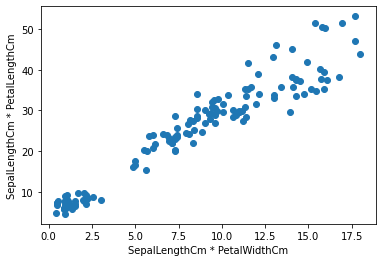

In [ ]:
# variance and plot

for i in range(1, len(list(train_data.columns))):
  print("variance of " + train_data.columns[i] + " - " + str(np.var(
      np.array(train_data[train_data.columns[i]].to_list()))))

for i in range(1, len(list(train_data.columns))):
  for j in range(1, len(list(train_data.columns))):
    if i == j : continue
    product = [train_data[train_data.columns[i]].to_list()[k] * 
           train_data[train_data.columns[j]].to_list()[k] for k in 
           range(len(train_data[train_data.columns[i]].to_list()))]

    print("variance of the product of " + train_data.columns[i]
          + " and " + train_data.columns[j] + " - ", 
                  np.var(np.array(product)))
    
print("\nThe best variance is produced by: \n1) Product of SepalLengthCm " 
      + "and PetalLengthCm \n2) Product of SepalLengthCm and PetalWidthCm\n")

print("Taking data with higher variance is easier for clustering because" + 
      " of the widespread data points\n")

y = [train_data["SepalLengthCm"].to_list()[i] * 
     train_data["PetalLengthCm"].to_list()[i] for i
                  in range(len(train_data["Id"].to_list()))]
          
x = [train_data["SepalLengthCm"].to_list()[i] * 
     train_data["PetalWidthCm"].to_list()[i] for i
                  in range(len(train_data["Id"].to_list()))]
          
plt.scatter(x,y)
plt.ylabel("SepalLengthCm * PetalLengthCm")
plt.xlabel("SepalLengthCm * PetalWidthCm")
plt.show()

In [ ]:
# this function is used to determine the centroids and clusters
def get_centroids(X_train, size, assumed_centroids, k):

  previous_centroids = assumed_centroids + 1
  centroids = assumed_centroids

  # until convergence
  while(centroids.all() != previous_centroids.all()):
    previous_centroids = centroids
    # array to store distances from centroids
    dists = np.array([]).reshape(size,0)
    final_dists = np.array([]).reshape(size,0)
    for j in range(k):
      temp_dist = np.sum((X_train - centroids[:,j])**2, axis=1)
      dists = np.hstack((dists,np.array([temp_dist.tolist()]).T))

    # indices of the centroid closest to any point
    c = np.argmin(dists, axis=1) + 1

    # storing data points under clusters for plotting
    output = {}
    for i in range(c.shape[0]):
      if c[i] not in output.keys(): 
        output[c[i]] = np.array([]).reshape(0,2)
      output[c[i]] = np.vstack((output[c[i]], X_train[i,:]))

    # updating centroids 
    for i in range(k):
      centroids[:,i] = np.mean(output[i+1], axis=0)

  return output, centroids

In [ ]:
# this function is used to predict the output
def predict(df, size, centroids):

  dists = np.array([]).reshape(size, 0)
  final_dists = np.array([]).reshape(size, 0)

  for j in range(centroids.shape[1]):
    temp_dist = np.sum((df - centroids[:,j])**2, axis=1)
    dists = np.hstack((dists,np.array([temp_dist.tolist()]).T))

    # indices of the centroid closest to any point
    c = np.argmin(dists, axis=1) + 1

  final = []
  for i in c.tolist():
    if i == 1: final.append("Iris-setosa")
    elif i == 2: final.append("Iris-versicolor")
    elif i == 3: final.append("Iris-virginica")
  return final 

In [ ]:
# this function is used to determine the accuarcy
def accuracy(df, output):
  accuracy = sum([1 if output[i] == df["Species"].to_list()[i] 
                else 0 for i in range(len(output))])

  print("Accuracy (in %): ", (accuracy/len(output))*100, "\n")

Accuracy (in %):  86.66666666666667 

The clustering obtained by performing k means:



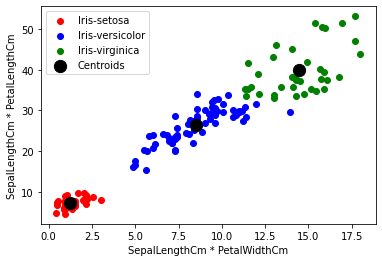


The actual clustering from the given data:



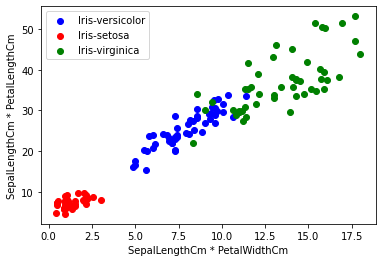


-------------------END of k mean-----------------------


In [ ]:
#---------------------Main k means clustering-------------------------

if __name__ == "__main__":
  size = len(x)
  X_train = np.array([x[0], y[0]])
  for i in range(1, len(x)):
    X_train = np.vstack((X_train, np.array([x[i], y[i]])))

  # From graph we can assume k = 3
  k = 3

  # choosing three random centroids
  centroids = np.array([[0, 7.5, 17.5], [0, 25, 40]])

  output, centroids = get_centroids(X_train, size, centroids, k)
  prediction = predict(X_train, size, centroids)
  accuracy(df, prediction)

  # output of k means clustering

  print("The clustering obtained by performing k means:\n")

  colors = ["red", "blue", "green"]
  labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

  for i in range(k):
    plt.scatter(output[i+1][:,0], output[i+1][:,1], c = colors[i],
                label = labels[i])

  plt.scatter(centroids[0,:],centroids[1,:], s=150, c = "black",
              label = "Centroids")

  plt.ylabel("SepalLengthCm * PetalLengthCm")
  plt.xlabel("SepalLengthCm * PetalWidthCm")
  plt.legend()
  plt.show()

  # actual clustering 

  print("\nThe actual clustering from the given data:\n")

  feature_pl = "PetalLengthCm"
  feature_pw = "PetalWidthCm"
  feature_sl = "SepalLengthCm"
  feature_sw = "SepalWidthCm"

  versi_df = df[df['Species'] == 'Iris-versicolor']

  y1 = [versi_df[feature_sl].to_list()[i]*versi_df[feature_pl].to_list()[i] 
                for i in range(len(versi_df[feature_sl].to_list()))]
  x1 = [versi_df[feature_sl].to_list()[i]*versi_df[feature_pw].to_list()[i] 
                for i in range(len(versi_df[feature_sl].to_list()))]

  plt.scatter(x1, y1, c = "blue", label = "Iris-versicolor")

  seto_df = df[df['Species'] == 'Iris-setosa']

  y2 = [seto_df[feature_sl].to_list()[i]*seto_df[feature_pl].to_list()[i] 
                for i in range(len(seto_df[feature_pl].to_list()))]
  x2 = [seto_df[feature_sl].to_list()[i]*seto_df[feature_pw].to_list()[i] 
                for i in range(len(seto_df[feature_sl].to_list()))]

  plt.scatter(x2, y2, c = "red", label = "Iris-setosa")

  virgi_df = df[df['Species'] == 'Iris-virginica']

  y3 = [virgi_df[feature_sl].to_list()[i]*virgi_df[feature_pl].to_list()[i] 
                for i in range(len(virgi_df[feature_sl].to_list())) ]
  x3 = [virgi_df[feature_sl].to_list()[i]*virgi_df[feature_pw].to_list()[i] 
                for i in range(len(virgi_df[feature_sl].to_list()))]

  plt.scatter(x3, y3, c = "green", label = "Iris-virginica")
  plt.ylabel("SepalLengthCm * PetalLengthCm")
  plt.xlabel("SepalLengthCm * PetalWidthCm")
  plt.legend()
  plt.show()

  print("\n-------------------END of k means-----------------------")


In [ ]:
#--------------------PCA algorithm-----------------------------------



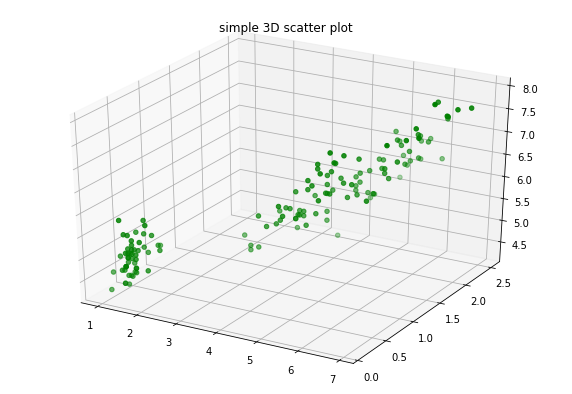

In [ ]:
z = np.array(train_data[train_data.columns[1]].to_list())
x = np.array(train_data[train_data.columns[3]].to_list())
y = np.array(train_data[train_data.columns[4]].to_list())
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [ ]:
"""Implement the K-Means Clustering and Principal Component Analysis algorithms 
from scratch in Python using Numpy and Pandas and Matplotlib for visualization.
The algorithm must be implemented as a function with arguments (dataset). 
The last column, Species needs to be removed before giving it as argument to 
the function. The column needs to stored in another variable for future 
comparison.
For Principal Component Analysis, the data (without Species column) must be 
plotted in the first three eigenvectors and the eigenvalues for the 
corresponding values should also be noted. 
In clustering, two plots one showing the output of the cluster and one showing 
actual species should be displayed."""